In [1]:
from ugropy import abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(1, 220, 220, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    solution = abdulelah_gani_p.get_groups(smiles, "smiles")
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()
    
    # Comparar con los subgrupos calculados
    if solution.subgroups_numbers != row_dict:
        print(smiles)
        print(idx)
        print(solution.subgroups)
        print(solution.subgroups_numbers)
        print(row_dict)
        
        wrong_smiles = smiles
        break


Brc1ccc(cc1)C(=O)NP(=O)(N2CC2)N3CC3
44
{}
{}
{15: 4, 97: 1, 126: 1, 168: 4, 176: 2, 201: 1}


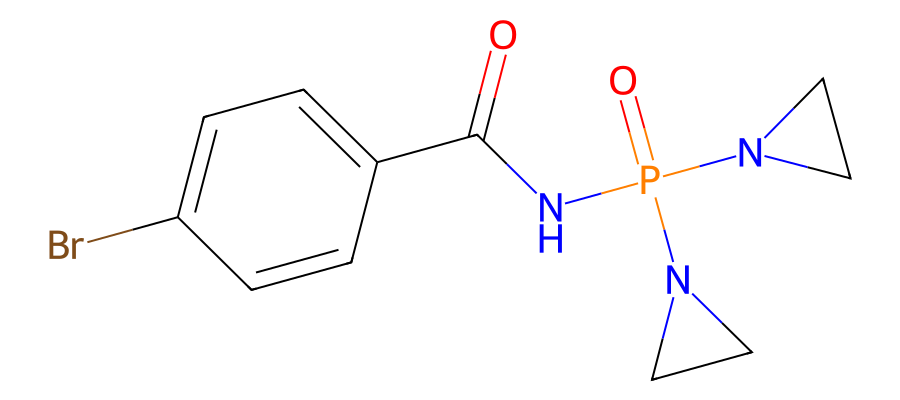

In [4]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=900, height=400)

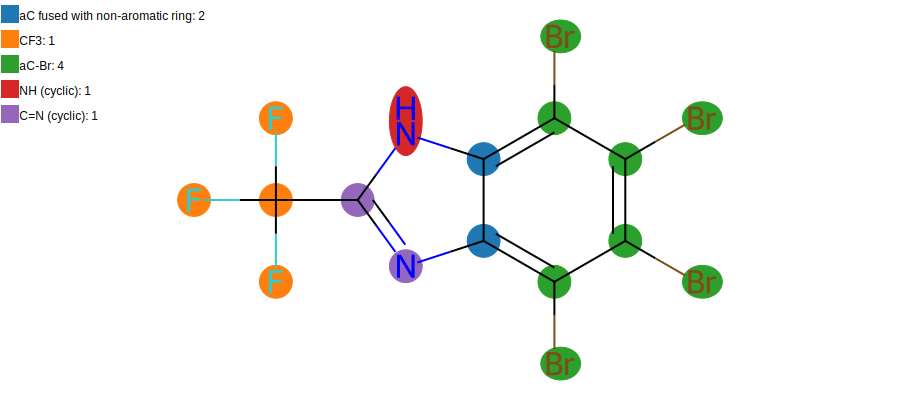

In [5]:
smiles = 'Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F'

sol = abdulelah_gani_p.get_groups(smiles, "smiles")

sol.draw(width=900, height=400)